In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 500)
dates = ['host_since', 'first_review', 'last_review']
df = pd.read_csv('../data/data_jan_listings_3plus.csv', parse_dates=dates, index_col='id', low_memory=False)

In [39]:
df.shape

(51750, 64)

In [27]:
df.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11551.0,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732000000000001,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$88.00,$645.00,"$2,350.00",$400.00,$30.00,2.0,$25.00,2.0,180.0,17.0,42,72,344,186,3.0,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56
13913.0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.568020000000004,-0.11120999999999999,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$333.00,"$1,176.00",$100.00,$15.00,1.0,$15.00,1.0,29.0,30.0,60,90,365,20,6.0,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17
15400.0,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditionin

In [44]:
host_df = df

In [45]:
host_df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [98]:
host_df2 = host_df.groupby(host_df['host_since'].dt.year).agg({'review_scores_rating' : 'mean',
                                                   'name' : 'count'}).reset_index()

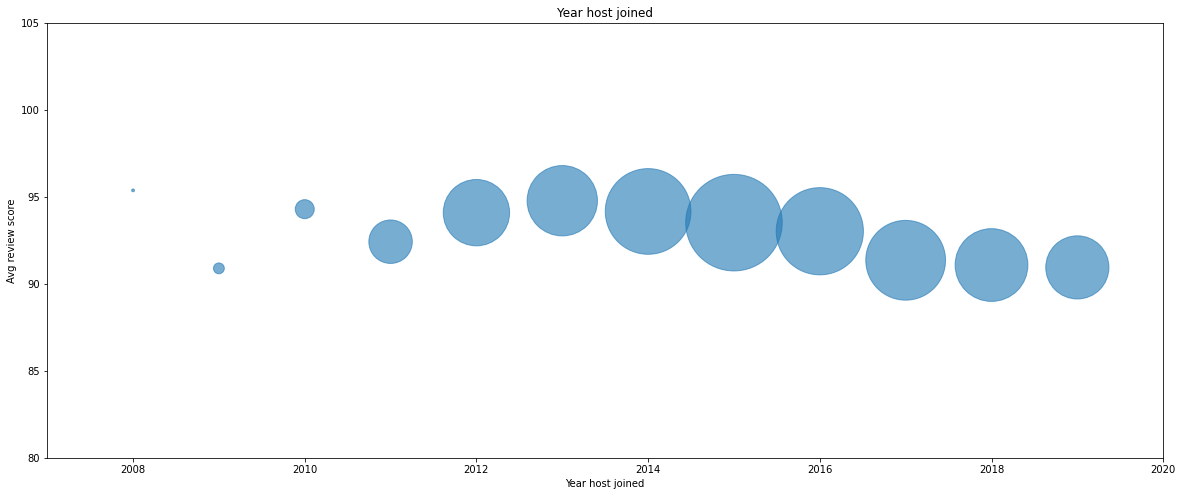

In [132]:
plt.figure(figsize=(20, 8))
plt.scatter(data=host_df2, x="host_since", y="review_scores_rating", s='name',alpha=0.6)
plt.xlim(2007, 2020)
plt.ylim(80, 105)
plt.title("Year host joined")
plt.xlabel("Year host joined")
plt.ylabel("Avg review score")
plt.show()


In [180]:
rev_feats = df[['review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']]


In [184]:
rev_feats.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.777741,0.732131,0.604520,0.663483,0.421144,0.777672
review_scores_accuracy,0.777741,1.000000,0.627898,0.579522,0.626148,0.403331,0.692315
review_scores_cleanliness,0.732131,0.627898,1.000000,0.450547,0.475558,0.350364,0.621509
review_scores_checkin,0.604520,0.579522,0.450547,1.000000,0.672448,0.338595,0.537894
review_scores_communication,0.663483,0.626148,0.475558,0.672448,1.000000,0.348883,0.581531
review_scores_location,0.421144,0.403331,0.350364,0.338595,0.348883,1.000000,0.405278
review_scores_value,0.777672,0.692315,0.621509,0.537894,0.581531,0.405278,1.000000


<AxesSubplot:>

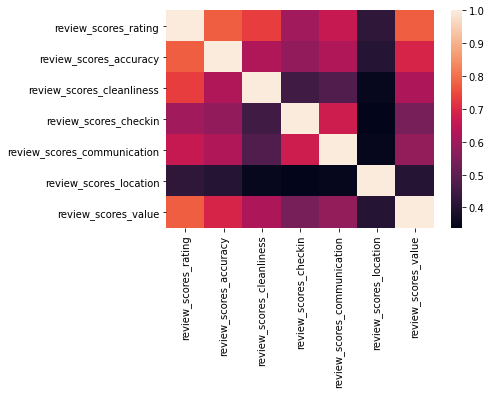

In [183]:
corre = rev_feats.corr()
sns.heatmap(corre)